In [1]:
from gurobipy import *
from math import factorial
import pandas as pd
import time
import numpy as np
from matplotlib import pyplot as plt

In [2]:
coord = {}
for i in range(1,189):
    if i < 33:
        coord[i] = [1,i]
    elif i < 65:
        coord[i] = [2,i-32]
    elif i < 96:
        coord[i] = [3,i-64]
    elif i < 127:
        coord[i] = [5,i-95]
    elif i < 158:
        coord[i] = [6,i-126]
    elif i < 189:
        coord[i] = [7,i-157]
d = {}
for i in range(1,189):
    for j in range(1,189):
        d[i,j] = abs(coord[i][0] - coord[j][0]) + abs(coord[i][1]-coord[j][1])

In [3]:
df = pd.read_excel (r'BD SEAT .xlsx')
df2 = df.dropna()
lim = 10

values = df2['UnitDesignator'].value_counts()[0:lim]
courses = values.keys()
#plt.bar(courses, values, color = 'darkblue')
#plt.xlabel("Seats")
#plt.ylabel("Number of times purchased")
#plt.title("Top 10 most purchased seats")
#plt.show()
maximo = max(df2['UnitDesignator'].value_counts())
normalizado = df2['UnitDesignator'].value_counts()/maximo


#plt.bar(normalizado.index[0:10],normalizado[0:10], color = 'darkblue')
#plt.xlabel("Seats")
#plt.ylabel("Seat rank")
#plt.title("Top 10 most purchased seats")
#plt.show()


vec = {}
for i in range(0, len(normalizado.index)):
    if len(normalizado.index[i]) == 2 :
        if normalizado.index[i][-1] == 'A':
            vec[int(normalizado.index[i][0])] = 1
        elif normalizado.index[i][-1] == 'B':
            vec[int(normalizado.index[i][0])+32] = 1
        elif normalizado.index[i][-1] == 'C':
            vec[int(normalizado.index[i][0])+32+32] = 1
        elif normalizado.index[i][-1] == 'D':
            vec[int(normalizado.index[i][0])+32+32+31] = 1
        elif normalizado.index[i][-1] == 'E':
            vec[int(normalizado.index[i][0])+32+32+31+31] = 1
        elif normalizado.index[i][-1] == 'F':
            vec[int(normalizado.index[i][0])+32+32+31+31+31] = 1
            
    elif len(normalizado.index[i]) == 3 :
        if normalizado.index[i][-1] == 'A':
            vec[int(normalizado.index[i][0:2])] = 1
        elif normalizado.index[i][-1] == 'B':
            vec[int(normalizado.index[i][0:2])+32] = 1
        elif normalizado.index[i][-1] == 'C':
            vec[int(normalizado.index[i][0:2])+32+32] = 1
        elif normalizado.index[i][-1] == 'D':
            vec[int(normalizado.index[i][0:2])+32+32+31] = 1
        elif normalizado.index[i][-1] == 'E':
            vec[int(normalizado.index[i][0:2])+32+32+31+31] = 1
        elif normalizado.index[i][-1] == 'F':
            vec[int(normalizado.index[i][0:2])+32+32+31+31+31] = 1
            
            
contador = -1
for i in vec.keys():
    contador += 1
    vec[i] = normalizado.values[contador]
    
    
    
df3 = df[df['DepartureDate'] == '2022-06-08']
df4 = df3[df3['FlightNumber'] == 59421]
qReal = df4['RecordLocator'].value_counts()

In [4]:
I = range(1,189) #188 sillas entones el range(1,189)

c = {}
a = {}
for i in I:
    a[i] = 1
    #c[i] = 1
vecc = [39,34,34,34,34,27,27,27,27,27,27,29,29,18,18,18,18,18,18,18,18,18,18,14,14,14,14,14,14,14,14,14]
vec2 = [34,29,29,29,29,22,22,22,22,22,22,24,24,12,12,12,12,12,12,12,12,12,12,9,9,9,9,9,9,9,9,9]


for i in range(0,32):
    c[i+1] = vecc[i]
    c[i+33] = vec2[i]
    if i != 31:
        c[i+65] = vecc[i]
        c[i+96] = vecc[i]
        c[i+127] = vec2[i]
        c[i+158] = vecc[i]
        
        
bono = 100
for i in c:
    if i != 32:
        c[i] = c[i] + bono*vec[i]
    
c[32] = 500
c[64] = 500
c[31] = 500
c[63] = 500
c[95] = 500
c[126] = 500
c[157] = 500
c[188] = 500
c[31] = 500
c[62] = 500
c[94] = 500
c[125] = 500   
c[156] = 500
c[187] = 500   
        
    
q = 3
qR = []
for i in qReal:
    qR.append(i)



if q > 1:
    fact = math.factorial(q)/(math.factorial(q-2))#*math.factorial(2))
else:
    fact = 0
   


beta = {}
delta = 7
for i in range(1,189):
    for j in range(1,189):
        if d[i,j] >= delta:
            beta[i,j] = 1
        else:
            beta[i,j] = 0        

In [ ]:
seats = {}
tInicial = time.time()

### Regla del balance
### Flujo de una reserva a una sillax
### Maximizar distancia (casi hecho)x
### Escribir un txt que muestre las sillas ocupadas y la iteración que fueron seleccionadas

### Parámetro binario para el rango de distancias (beta)x
### Agregar pesos en la función objetivox
### Revisar que las variables y[i,j] estén dando bienx


### Como algunas veces con la restricción del beta, el problema puede dar infactible, debido a que 
### no hay sillas para tener dicho mínimo de distancia, se debe relajar ese constraint. (Si el problema da inf)x


### Generar grafo y usar notación en el escritox
### El modelo tiene 1 grafo: 1 para yij que conecta sillas con sillas y el flujo es la distancia y costox


### Solución para el tiempo? Cuando la persona oprima el botón de check in, el modelo empieza a correr y la silla le llega al correo cuando el modelo haya terminado


### Tal vez vale más la pena darle un peso mayor al precio de la sillax



### Hacer escenarios para q[k] fijos i.e. 1, 2, 3 y 4x
### Crear un vector de q[k] con un vuelo especifico (datos) para probar tiempo computacional en un escenario realx
### Asignar un precio "bono" base y multiplicar por la frecuencia de compra normalizadax
### Gráficas de tiempo contra iteración para un q fijox
### Tiempos para diferentes qs
### Agregar un contador de veces que se relaja el parámetro de distanciax
### Realizar las recomendaciones de David
### Como trabajo futuro, sintonizar parámetros beta y deltax
### Como trabajo futuro, tener en cuenta la ventas futuras (check ins) para x
### Como trabajo futuro, ajustar a una distribución el número de personas por reserva para hacer mejores simulacionesx





### Se puede revisar primero si es infactible. Si lo es se, relaja el parámetro delta hasta que vuelva a ser factible
### Para un q dinámico, se puede reestablecer el parámetro delta a 7 si es relajado.
### Actualizar assignemnt con parámetro delta = 7 y gráficas, etc.

q=3
seats = {}
t = 0
OFmax = 148

OFx = []
OFy = []


while OFmax != 48:
    t = t + 1
    
    m = Model("Proyecto: "+str(t))

    betaa = 10e-6
    rango = 100
    # Variable de decisión
    x = {(i):m.addVar(vtype=GRB.BINARY, obj = c[i], name="x"+str(i)) for i in I}#1.8*C[i]
    y = {(i,j):m.addVar(vtype=GRB.BINARY, obj = 0, name="y"+str(i)+str(j)) for i in I for j in I if j!=i}#-1.5*d[i,j]
    slack = m.addVar(vtype = GRB.CONTINUOUS, obj = betaa/rango)



    deltaa = 0.5



    eta = OFmax - deltaa

    m.addConstr(quicksum(y[i,j]*d[i,j] for i in I for j in I if i!=j) - slack == eta)

    # Restricciones
    for i in I:
        #(1c)
        m.addConstr(x[i] <= 1)
        #(1d)
        m.addConstr(x[i] <= a[i])
        # propios
        m.addConstr(x[i]*(q-1) == quicksum(y[i,m] for m in I if m!=i))
        m.addConstr(x[i]*(q-1) == quicksum(y[m,i] for m in I if m!=i))


        for j in I:
            if i!=j:
                m.addConstr(y[i,j] <= beta[i,j])

    m.addConstr(quicksum(x[i] for i in I) == q)
        #(1i)
    m.addConstr(quicksum(y[j,i] for j in I for i in I if j!=i) == fact)
    
    
    

    m.ModelSense = 1 # Para minimizar
    m.setParam("OutputFlag",0)
    m.setParam("DualReductions",0)
    m.setParam("InfUnbdInfo", 1)
    m.optimize()

    xvals = { k : v.X for k,v in x.items() }
    yvals = { k : v.X for k,v in y.items() }
    yOF = sum(yvals[i,j] * d[i,j] for i in I for j in I if i!=j)
    xOF = sum(xvals[i] * c[i] for i in I)
    
    OFmax = yOF
    
    OFy.append(yOF)
    OFx.append(xOF)

    print(OFmax)

In [ ]:
slack

In [ ]:
plt.plot(OFx, OFy)
plt.xlabel("Cost")
plt.ylabel("Distance")
plt.title("Pareto front")

In [ ]:
m.objVal

In [ ]:
yOF


In [ ]:
xvals = { k : v.X for k,v in x.items() }
yvals = { k : v.X for k,v in y.items() }
xOF = sum(xvals[i] * c[i] for i in I)
yOF = sum(yvals[i,j] * d[i,j] for i in I for j in I if i!=j)
1.8*xOF-1.5*yOF==m.objVal

In [ ]:
xOF ### y activa en la FO

In [ ]:
yOF ### y activa en la FO

In [ ]:
xOF  ### x activa en la FO

In [ ]:
yOF   ### x activa en la FO

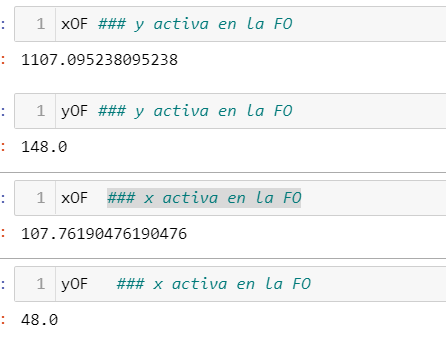

In [5]:
seats = {}
tInicial = time.time()

### Regla del balance
### Flujo de una reserva a una sillax
### Maximizar distancia (casi hecho)x
### Escribir un txt que muestre las sillas ocupadas y la iteración que fueron seleccionadas

### Parámetro binario para el rango de distancias (beta)x
### Agregar pesos en la función objetivox
### Revisar que las variables y[i,j] estén dando bienx


### Como algunas veces con la restricción del beta, el problema puede dar infactible, debido a que 
### no hay sillas para tener dicho mínimo de distancia, se debe relajar ese constraint. (Si el problema da inf)x


### Generar grafo y usar notación en el escritox
### El modelo tiene 1 grafo: 1 para yij que conecta sillas con sillas y el flujo es la distancia y costox


### Solución para el tiempo? Cuando la persona oprima el botón de check in, el modelo empieza a correr y la silla le llega al correo cuando el modelo haya terminado


### Tal vez vale más la pena darle un peso mayor al precio de la sillax



### Hacer escenarios para q[k] fijos i.e. 1, 2, 3 y 4x
### Crear un vector de q[k] con un vuelo especifico (datos) para probar tiempo computacional en un escenario realx
### Asignar un precio "bono" base y multiplicar por la frecuencia de compra normalizadax
### Gráficas de tiempo contra iteración para un q fijox
### Tiempos para diferentes qs
### Agregar un contador de veces que se relaja el parámetro de distanciax
### Realizar las recomendaciones de David
### Como trabajo futuro, sintonizar parámetros beta y deltax
### Como trabajo futuro, tener en cuenta la ventas futuras (check ins) para x
### Como trabajo futuro, ajustar a una distribución el número de personas por reserva para hacer mejores simulacionesx





### Se puede revisar primero si es infactible. Si lo es se, relaja el parámetro delta hasta que vuelva a ser factible
### Para un q dinámico, se puede reestablecer el parámetro delta a 7 si es relajado.
### Actualizar assignemnt con parámetro delta = 7 y gráficas, etc.

q=3
seats = {}
t = 0
OFmax = 1107.0952

OFx = []
OFy = []

betaa = 10e-6
rango = 1000

while OFmax > 107.7619:
    
    
    t = t + 1
    
    m = Model("Proyecto: "+str(t))

    # Variable de decisión
    x = {(i):m.addVar(vtype=GRB.BINARY, obj = 0, name="x"+str(i)) for i in I}#1.8*C[i]
    y = {(i,j):m.addVar(vtype=GRB.BINARY, obj = d[i,j], name="y"+str(i)+str(j)) for i in I for j in I if j!=i}#-1.5*d[i,j]
    slack = m.addVar(vtype = GRB.CONTINUOUS, obj = -betaa/rango)



    deltaa = 1



    eta = OFmax - deltaa

    m.addConstr(quicksum(x[i]*c[i] for i in I) + slack == eta)

    # Restricciones
    for i in I:
        #(1c)
        m.addConstr(x[i] <= 1)
        #(1d)
        m.addConstr(x[i] <= a[i])
        # propios
        m.addConstr(x[i]*(q-1) == quicksum(y[i,m] for m in I if m!=i))
        m.addConstr(x[i]*(q-1) == quicksum(y[m,i] for m in I if m!=i))


        for j in I:
            if i!=j:
                m.addConstr(y[i,j] <= beta[i,j])

    m.addConstr(quicksum(x[i] for i in I) == q)
        #(1i)
    m.addConstr(quicksum(y[j,i] for j in I for i in I if j!=i) == fact)
    
    
    

    m.ModelSense = -1 # Para maximizar
    m.setParam("OutputFlag",0)
    m.setParam("DualReductions",0)
    m.setParam("InfUnbdInfo", 1)
    m.optimize()

    if m.status == 3:
        OFmax = 100
    else:
        xvals = { k : v.X for k,v in x.items() }
        yvals = { k : v.X for k,v in y.items() }
        yOF = sum(yvals[i,j] * d[i,j] for i in I for j in I if i!=j)
        xOF = sum(xvals[i] * c[i] for i in I)

        OFmax = xOF

        OFy.append(yOF)
        OFx.append(xOF)

    print(OFmax)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-02-04
1100.1904761904761
1096.857142857143
1086.142857142857
1083.7619047619048
739.1904761904761
725.5238095238095
721.0952380952381
718.2380952380953
715.3809523809524
713.0
710.047619047619
708.2380952380953
705.8571428571429
703.952380952381
702.2857142857142
699.3333333333334
697.0
694.9047619047619
693.7142857142858
691.3333333333333
690.047619047619
688.4761904761905
686.3333333333334
684.5714285714286
682.5238095238097
681.3333333333333
679.8571428571429
677.9047619047619
675.7619047619047
674.3333333333333
672.4761904761905
670.5238095238095
669.1904761904761
666.5238095238095
663.9047619047619
662.5238095238095
661.0
659.3809523809524
657.7142857142858
656.3333333333334
653.952380952381
651.7619047619048
649.5714285714286
648.1904761904761
646.8095238095237
644.8095238095239
642.0
640.3333333333333
638.8571428571428
636.5238095238095
634.1428571428571
631.7142857142858
627.952380952381
625.57

Text(0.5, 1.0, 'Pareto front')

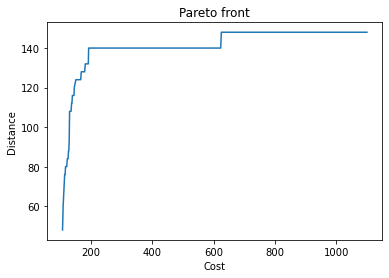

In [6]:
plt.plot(OFx, OFy)
plt.xlabel("Cost")
plt.ylabel("Distance")
plt.title("Pareto front")

In [7]:
OFx

[1100.1904761904761,
 1096.857142857143,
 1086.142857142857,
 1083.7619047619048,
 739.1904761904761,
 725.5238095238095,
 721.0952380952381,
 718.2380952380953,
 715.3809523809524,
 713.0,
 710.047619047619,
 708.2380952380953,
 705.8571428571429,
 703.952380952381,
 702.2857142857142,
 699.3333333333334,
 697.0,
 694.9047619047619,
 693.7142857142858,
 691.3333333333333,
 690.047619047619,
 688.4761904761905,
 686.3333333333334,
 684.5714285714286,
 682.5238095238097,
 681.3333333333333,
 679.8571428571429,
 677.9047619047619,
 675.7619047619047,
 674.3333333333333,
 672.4761904761905,
 670.5238095238095,
 669.1904761904761,
 666.5238095238095,
 663.9047619047619,
 662.5238095238095,
 661.0,
 659.3809523809524,
 657.7142857142858,
 656.3333333333334,
 653.952380952381,
 651.7619047619048,
 649.5714285714286,
 648.1904761904761,
 646.8095238095237,
 644.8095238095239,
 642.0,
 640.3333333333333,
 638.8571428571428,
 636.5238095238095,
 634.1428571428571,
 631.7142857142858,
 627.95238

In [8]:
OFy

[148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.00000000000003,
 148.0,
 148.00000000000006,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 148.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 139.99999999999997,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.00002158313453,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 140.0,
 132.0,
 132.0,
 132.0,
 132.0,
 132.0,
 132.0,
 132.0,
 128.0,
 128.0,
 128.0,
 128.0,
 128

In [9]:
len(OFy)

153

In [ ]:
len(seats)

In [ ]:
seats

In [ ]:
timeInSeconds = []
for i in timee.keys():
    timeInSeconds.append(timee[i]*60)

In [ ]:
plt.xlabel("Iteration")
plt.ylabel("Time [Seconds]")
plt.title("Time for each iteration when q=" + str(q))
plt.plot(timeInSeconds)


In [ ]:
plt.xlabel("Iteration")
plt.ylabel("Objective function")
plt.title("Objective function for iteration when q=" + str(q))
plt.plot(OFS.values())

In [ ]:
sum(qReal)

In [ ]:
seats

In [ ]:
m.status

In [ ]:
m.objVal

In [ ]:
timee = {}
contBeta = 0
t = 0
OFS = {}
while sum(a.values()) > 0:
    tIter = time.time()
    t = t + 1
    
    #q = qR[t-1]
    
    #if q > 1:
    #    fact = math.factorial(q)/(math.factorial(q-2))#*math.factorial(2))
    #else:
    #    fact = 0
        
    m = Model("Proyecto: "+str(t))

    # Variable de decisión
    x = {(i):m.addVar(vtype=GRB.BINARY, obj = 1.8*c[i], name="x"+str(i)) for i in I}
    y = {(i,j):m.addVar(vtype=GRB.BINARY, obj = -1.5*d[i,j], name="y"+str(i)+str(j)) for i in I for j in I if j!=i}



    # Restricciones
    for i in I:
        #(1c)
        m.addConstr(x[i] <= 1)
        #(1d)
        m.addConstr(x[i] <= a[i])
        # propios
        m.addConstr(x[i]*(q-1) == quicksum(y[i,m] for m in I if m!=i))
        m.addConstr(x[i]*(q-1) == quicksum(y[m,i] for m in I if m!=i))

        
        for j in I:
            if i!=j:
                m.addConstr(y[i,j] <= beta[i,j])
        
    
        
    m.addConstr(quicksum(x[i] for i in I) == q)
    
        #(1i)
    m.addConstr(quicksum(y[j,i] for j in I for i in I if j!=i) == fact)
    
    

    
    m.ModelSense = 1 # Para minimizar
    m.setParam("OutputFlag",0)
    m.setParam("DualReductions",0)
    m.setParam("InfUnbdInfo", 1)
    m.optimize()

    if m.Status == 3 and delta >= 1: # Si el problema es infactible, se relaja la restricción de distancia
        
        t = t - 1
        contBeta += 1
        delta = delta - 1
        for i in range(1,189):
            for j in range(1,189):
                if d[i,j] >= delta:
                    beta[i,j] = 1
                else:
                    beta[i,j] = 0
    else:
        
        #if t%20==0:# and q!=1:
        #print("Iteration: " + str(t))
            #timee.append((time.time()-tIter)/60)
        timee[t] = round((time.time()-tIter)/60,4)
        OFS[t] = m.objVal
        #print('Time for iteration: ' + str(timee[t]))
        #OF = m.objVal


        vals = { k : v.X for k,v in x.items() }
        for b in vals:
            if vals[b] == 1:
                a[b] = 0
                seats[b] = t
            
            
tTotal = round(time.time() - tInicial,5)  
